# Code for stabilising the Izhikevich Neuron (finding the Ihold and Iscale)

## libraries

In [1]:
from brian2 import *
%matplotlib inline

start_scope()

### creating timed array with current

In [308]:
defaultclock.dt = 0.01*ms
runtime = 2*second
mu = 40
sigma = 0
Inoise = TimedArray(np.random.normal(mu,sigma,int(runtime/defaultclock.dt))*uA,
                      dt=defaultclock.dt)

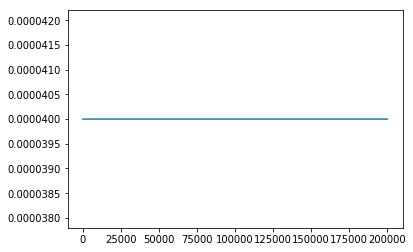

In [309]:
figure
plot(Inoise.values)

### constants 

In [317]:
#constants for main model
C=2*ufarad
Bm=-1.2*mV
gamma_m=18*mV
gamma_w=10*mV
gfast=20*mS
E_Na=50*mV
gslow=20*mS
E_K=-100*mV
gleak=2*mS
E_leak=-70*mV
phi_w = 0.15

#MAIN CONSTANT OF MODEL
Bw=-10*mV

### model equations

In [318]:
eqs ='''
dV/dt=1/C*(Inoise(t)-gfast*hinf*(V-E_Na)-gslow*w*(V-E_K)-gleak*(V-E_leak)): volt
hinf = 0.5*(1+tanh((V-Bm)/gamma_m)) : 1
dw/dt= (phi_w*(winf-w)/tau_w)*Hz : 1
winf = 0.5*(1+tanh((V-Bw)/gamma_w)) : 1
tau_w = 1/(phi_w*cosh((V-Bw)/(2*gamma_w))) : 1
'''

Text(0.5, 0, 'V (mV)')

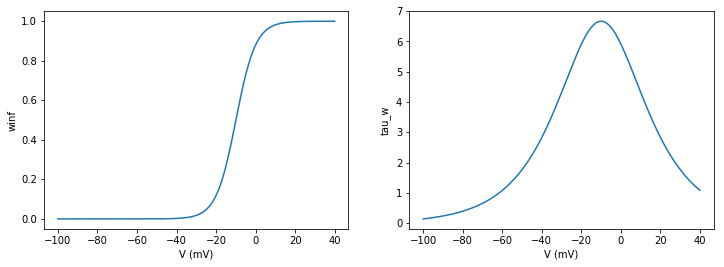

In [319]:
Vplot = arange(-100,40,0.1)*mV
figure(figsize=(12,4))
subplot(121)
plot(Vplot/mV, 0.5*(1+tanh((Vplot-Bw)/gamma_w)))
ylabel('winf')
xlabel('V (mV)')
subplot(122)
plot(Vplot/mV, 1/(phi_w*cosh((Vplot-Bw)/(2*gamma_w))))
ylabel('tau_w')
xlabel('V (mV)')

### neuron statement

In [320]:
G=NeuronGroup(1,eqs,dt=0.1*ms,method='euler')
initial_values = {'V': -70*mV, 'w': 0.0005}
G.set_states(initial_values)

### monitor statement

In [321]:
M = StateMonitor(G, 'V', record=True,dt=0.1*ms)
Mw = StateMonitor(G, 'w', record=True,dt=0.1*ms)

## Running the simulation

In [322]:
run(runtime)

### plot

array([0.0005    , 0.00049999, 0.00049998, ..., 0.15675294, 0.15675775,
       0.15676257])

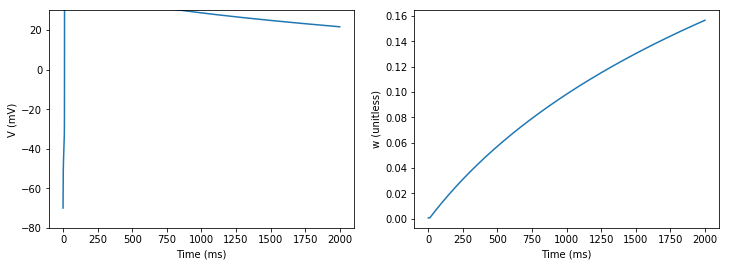

In [323]:
plotting
figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.V[0]/mV)
xlabel('Time (ms)')
ylabel('V (mV)')
ylim((-80,30))
subplot(122)
plot(Mw.t/ms, Mw.w[0])
xlabel('Time (ms)')
ylabel('w (unitless)')
# ylim((0, 1))

Mw.w[0]